# Model Restaurant

In [1]:
import pandas as pd
import numpy as np
#import tensorflowjs as tfjs
import tensorflow as tf
from tensorflowjs import converters
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
restaurant_place = pd.read_csv("C:/Users/LENOVO/Downloads/Restaurant_Data.csv")
restaurant_place = restaurant_place.drop(columns = "Unnamed: 0")
restaurant_review = pd.read_csv("C:/Users/LENOVO/Downloads/Restaurant_Reviewers.csv")
restaurant_review = restaurant_review.drop(columns = "Unnamed: 0")

In [3]:
restaurant_place

,name,place_id,formatted_address,types,user_ratings_total,rating
0,Taman Bali Vegetarian Restaurant,ChIJzRR1QYwWei4Rh_RvD_QvSwE,"Jl. Moh. Saleh Wedisastro No.4, Setabelan, Kec...","restaurant,food,point_of_interest,establishment",346,4.6
1,Nasi Campur Bali Gus Yan,ChIJHUOuL2IWei4R8oOTjOJz10Q,"57139, Punggawan, Kec. Banjarsari, Kota Suraka...","restaurant,food,point_of_interest,establishment",3,4.0
2,Nasi Bali Merthasari,ChIJW5dFG_MWei4RadsJ6wcpGok,"Jl. Irian No.38, Tegalharjo, Kec. Jebres, Kota...","restaurant,food,point_of_interest,establishment",110,4.5
3,Nasi Jinggo Bali 58,ChIJ9w7P-WsWei4R2PaAqN_T8oM,"Jl. Brigjen Sudiarto, Danukusuman, Kec. Sereng...","restaurant,food,point_of_interest,establishment",4,5.0
4,Bali Resto,ChIJr0dgN4IWei4RzbvoqC6i1Zc,"LGF , Solo Paragon , JL. Yosodipuro , Keprabon...","restaurant,food,point_of_interest,establishment",2,2.0
...,...,...,...,...,...,...
707,Indie Restaurant,ChIJwYfUbaNXei4RBQWELFjAYTA,"Indies Heritage Hotel Area, Jl. Prawirotaman 3...","restaurant,cafe,food,point_of_interest,establi...",7,4.6
708,SamaZana Restaurant,ChIJAx-ueuhZei4Rn4_nPQ6LZwE,"Royal Ambarrukmo Yogyakarta, Jl. Laksda Adisuc...","restaurant,food,point_of_interest,establishment",276,4.7
709,Dapur Manado Restaurant,ChIJB7rcodZZei4ROcjvKzgppxQ,"Jl. Kompol Bambang Suprapto, Baciro, Kec. Gond...","restaurant,food,point_of_interest,store,establ...",1689,4.5
710,Shinta Restaurant,ChIJ_9ekOyZYei4RvLCGQeIZzSs,"JL. Malioboro, 57, Sosromenduran, Gedong Tenge...","restaurant,food,point_of_interest,establishment",3,4.7


In [4]:
types_dummies = pd.get_dummies(restaurant_place['types'].str.get_dummies(','), prefix='types', prefix_sep='_')
types_dummies

,art_gallery,bakery,bar,cafe,establishment,food,liquor_store,lodging,meal_delivery,meal_takeaway,night_club,point_of_interest,restaurant,school,store,tourist_attraction
0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0
708,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0
709,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0
710,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0


In [5]:
df_all = pd.concat([restaurant_place, types_dummies], axis=1)
df_all = df_all.drop(columns = ["name", "formatted_address", "types"])
df_all = pd.merge(restaurant_review, df_all, on = "place_id")
df_all.rename(columns={'rating': 'Ave_Rating'}, inplace=True)
df_all['reviewers_Id'] = pd.factorize(df_all['reviewer_name'])[0] + 1
df_all

,place_id,place_name,reviewer_name,reviewer_rating,reviewer_review,user_ratings_total,Ave_Rating,art_gallery,bakery,bar,...,lodging,meal_delivery,meal_takeaway,night_club,point_of_interest,restaurant,school,store,tourist_attraction,reviewers_Id
0,ChIJzRR1QYwWei4Rh_RvD_QvSwE,Taman Bali Vegetarian Restaurant,Wisata Sightseeing,5,Delectable Vegetarian Chinese Food. Reasonabl...,346,4.6,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,ChIJzRR1QYwWei4Rh_RvD_QvSwE,Taman Bali Vegetarian Restaurant,Meila Fitriana,4,I visited this restaurant twice. When I was th...,346,4.6,0,0,0,...,0,0,0,0,1,1,0,0,0,2
2,ChIJzRR1QYwWei4Rh_RvD_QvSwE,Taman Bali Vegetarian Restaurant,Robert Stitson,5,Enak. Vegetarian meals including nice tasting ...,346,4.6,0,0,0,...,0,0,0,0,1,1,0,0,0,3
3,ChIJzRR1QYwWei4Rh_RvD_QvSwE,Taman Bali Vegetarian Restaurant,Adhit Wp,5,"Taste good, i order 2 menu with rice & drink f...",346,4.6,0,0,0,...,0,0,0,0,1,1,0,0,0,4
4,ChIJzRR1QYwWei4Rh_RvD_QvSwE,Taman Bali Vegetarian Restaurant,Nida Sahara L,4,Good,346,4.6,0,0,0,...,0,0,0,0,1,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,ChIJAURypDRYei4Rq6DGNK7W_4Y,Restoran Bumbu Desa,Keluarga Bontanghe,5,This restaurant provides buffet menu with vari...,4496,4.4,0,0,0,...,0,0,0,0,1,1,0,0,0,991
3233,ChIJAURypDRYei4Rq6DGNK7W_4Y,Restoran Bumbu Desa,Ike Ikrima,5,I came here first time with my family. Very gr...,4496,4.4,0,0,0,...,0,0,0,0,1,1,0,0,0,2896
3234,ChIJAURypDRYei4Rq6DGNK7W_4Y,Restoran Bumbu Desa,Labibah Zain,4,Great sundanese food. Great tastes. The parkin...,4496,4.4,0,0,0,...,0,0,0,0,1,1,0,0,0,2897
3235,ChIJAURypDRYei4Rq6DGNK7W_4Y,Restoran Bumbu Desa,Ode Ladamay (Oudhey),5,"Nice and clean place, good for group lunch,\nD...",4496,4.4,0,0,0,...,0,0,0,0,1,1,0,0,0,2898


In [6]:
df_place = df_all.drop(columns = ["place_name", "reviewer_name", "reviewer_rating", "reviewer_review", "reviewers_Id", "user_ratings_total", "point_of_interest", "tourist_attraction", "establishment"])
df_place

,place_id,Ave_Rating,art_gallery,bakery,bar,cafe,food,liquor_store,lodging,meal_delivery,meal_takeaway,night_club,restaurant,school,store
0,ChIJzRR1QYwWei4Rh_RvD_QvSwE,4.6,0,0,0,0,1,0,0,0,0,0,1,0,0
1,ChIJzRR1QYwWei4Rh_RvD_QvSwE,4.6,0,0,0,0,1,0,0,0,0,0,1,0,0
2,ChIJzRR1QYwWei4Rh_RvD_QvSwE,4.6,0,0,0,0,1,0,0,0,0,0,1,0,0
3,ChIJzRR1QYwWei4Rh_RvD_QvSwE,4.6,0,0,0,0,1,0,0,0,0,0,1,0,0
4,ChIJzRR1QYwWei4Rh_RvD_QvSwE,4.6,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,ChIJAURypDRYei4Rq6DGNK7W_4Y,4.4,0,0,0,0,1,0,0,0,0,0,1,0,0
3233,ChIJAURypDRYei4Rq6DGNK7W_4Y,4.4,0,0,0,0,1,0,0,0,0,0,1,0,0
3234,ChIJAURypDRYei4Rq6DGNK7W_4Y,4.4,0,0,0,0,1,0,0,0,0,0,1,0,0
3235,ChIJAURypDRYei4Rq6DGNK7W_4Y,4.4,0,0,0,0,1,0,0,0,0,0,1,0,0


In [7]:
df_user = df_all.drop(columns = ["place_id", "place_name", "reviewer_review", "reviewer_name", "user_ratings_total", "Ave_Rating", "point_of_interest", "tourist_attraction", "establishment"])
reviewer_id = df_user.pop("reviewers_Id")
df_user.insert(0, 'reviewers_Id', reviewer_id)
df_user

,reviewers_Id,reviewer_rating,art_gallery,bakery,bar,cafe,food,liquor_store,lodging,meal_delivery,meal_takeaway,night_club,restaurant,school,store
0,1,5,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2,4,0,0,0,0,1,0,0,0,0,0,1,0,0
2,3,5,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,5,0,0,0,0,1,0,0,0,0,0,1,0,0
4,5,4,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,991,5,0,0,0,0,1,0,0,0,0,0,1,0,0
3233,2896,5,0,0,0,0,1,0,0,0,0,0,1,0,0
3234,2897,4,0,0,0,0,1,0,0,0,0,0,1,0,0
3235,2898,5,0,0,0,0,1,0,0,0,0,0,1,0,0


In [8]:
column_sum = df_user.loc[:, 'art_gallery':'store'].sum()
column_sum

art_gallery        10
bakery             20
bar               215
cafe              185
food             3237
liquor_store       10
lodging            25
meal_delivery      10
meal_takeaway      14
night_club         65
restaurant       3232
school              5
store              90
dtype: int64

In [9]:
df_user.iloc[:, 2:] = df_user.iloc[:, 2:].mul(df_user["reviewer_rating"], axis=0)
df_user

,reviewers_Id,reviewer_rating,art_gallery,bakery,bar,cafe,food,liquor_store,lodging,meal_delivery,meal_takeaway,night_club,restaurant,school,store
0,1,5,0,0,0,0,5,0,0,0,0,0,5,0,0
1,2,4,0,0,0,0,4,0,0,0,0,0,4,0,0
2,3,5,0,0,0,0,5,0,0,0,0,0,5,0,0
3,4,5,0,0,0,0,5,0,0,0,0,0,5,0,0
4,5,4,0,0,0,0,4,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,991,5,0,0,0,0,5,0,0,0,0,0,5,0,0
3233,2896,5,0,0,0,0,5,0,0,0,0,0,5,0,0
3234,2897,4,0,0,0,0,4,0,0,0,0,0,4,0,0
3235,2898,5,0,0,0,0,5,0,0,0,0,0,5,0,0


In [10]:
y = df_user.pop("reviewer_rating")
y

0       5
1       4
2       5
3       5
4       4
       ..
3232    5
3233    5
3234    4
3235    5
3236    5
Name: reviewer_rating, Length: 3237, dtype: int64

In [11]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3237 entries, 0 to 3236
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   reviewers_Id   3237 non-null   int64
 1   art_gallery    3237 non-null   int64
 2   bakery         3237 non-null   int64
 3   bar            3237 non-null   int64
 4   cafe           3237 non-null   int64
 5   food           3237 non-null   int64
 6   liquor_store   3237 non-null   int64
 7   lodging        3237 non-null   int64
 8   meal_delivery  3237 non-null   int64
 9   meal_takeaway  3237 non-null   int64
 10  night_club     3237 non-null   int64
 11  restaurant     3237 non-null   int64
 12  school         3237 non-null   int64
 13  store          3237 non-null   int64
dtypes: int64(14)
memory usage: 379.3 KB


In [12]:
average_values = df_user.groupby("reviewers_Id")[["art_gallery", "bakery", "bar", "cafe", "food", "liquor_store", "lodging", "meal_delivery", "meal_takeaway", "night_club", "restaurant", "school", "store"]].mean()
average_values = average_values.reset_index()
average_values

,reviewers_Id,art_gallery,bakery,bar,cafe,food,liquor_store,lodging,meal_delivery,meal_takeaway,night_club,restaurant,school,store
0,1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2895,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
2895,2896,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
2896,2897,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2897,2898,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [13]:
df_user = pd.merge(df_user["reviewers_Id"], average_values, on = "reviewers_Id")
df_user

,reviewers_Id,art_gallery,bakery,bar,cafe,food,liquor_store,lodging,meal_delivery,meal_takeaway,night_club,restaurant,school,store
0,1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,2895,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3233,2896,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3234,2897,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
3235,2898,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [14]:
item_vecs = df_place.drop_duplicates(subset="place_id", keep='first')
item_vecs = item_vecs.drop(columns = "place_id")
item_vecs = item_vecs.to_numpy()
item_vecs

array([[4.6, 0. , 0. , ..., 1. , 0. , 0. ],
       [4. , 0. , 0. , ..., 1. , 0. , 0. ],
       [4.5, 0. , 0. , ..., 1. , 0. , 0. ],
       ...,
       [4.5, 0. , 0. , ..., 1. , 0. , 1. ],
       [4.7, 0. , 0. , ..., 1. , 0. , 0. ],
       [4.4, 0. , 0. , ..., 1. , 0. , 0. ]])

In [15]:
item_train = df_place.iloc[:, 1:]
item_train = item_train.to_numpy()
item_train

array([[4.6, 0. , 0. , ..., 1. , 0. , 0. ],
       [4.6, 0. , 0. , ..., 1. , 0. , 0. ],
       [4.6, 0. , 0. , ..., 1. , 0. , 0. ],
       ...,
       [4.4, 0. , 0. , ..., 1. , 0. , 0. ],
       [4.4, 0. , 0. , ..., 1. , 0. , 0. ],
       [4.4, 0. , 0. , ..., 1. , 0. , 0. ]])

In [16]:
user_train = df_user.iloc[:, 1:]
user_train = user_train.to_numpy()
user_train

array([[0., 0., 0., ..., 5., 0., 0.],
       [0., 0., 0., ..., 4., 0., 0.],
       [0., 0., 0., ..., 5., 0., 0.],
       ...,
       [0., 0., 0., ..., 4., 0., 0.],
       [0., 0., 0., ..., 5., 0., 0.],
       [0., 0., 0., ..., 5., 0., 0.]])

In [17]:
y_train = y.to_numpy()
y_train

array([5, 4, 5, ..., 4, 5, 5], dtype=int64)

In [18]:
scalerItem = StandardScaler()
item_train_scaled = scalerItem.fit_transform(item_train)
item_train_unscaled = item_train

scalerUser = StandardScaler()
user_train_scaled = scalerUser.fit_transform(user_train)
user_train_unscaled = user_train

scalerTarget = MinMaxScaler((-1, 1))
y_train_scaled = scalerTarget.fit_transform(y_train.reshape(-1, 1))
y_train_unscaled = y_train

In [19]:
item_train, item_test, item_train_scaled, item_test_scaled = train_test_split(item_train, item_train_scaled, train_size=0.90, shuffle=True, random_state=1)
user_train, user_test, user_train_scaled, user_test_scaled = train_test_split(user_train, user_train_scaled, train_size=0.90, shuffle=True, random_state=1)
y_train, y_test, y_train_scaled, y_test_scaled = train_test_split(y_train, y_train_scaled, train_size=0.90, shuffle=True, random_state=1)

In [20]:
num_user_features = user_train.shape[1]
num_item_features = item_train.shape[1]

In [21]:
num_outputs = 8
tf.random.set_seed(42)
user_NN = tf.keras.models.Sequential([   
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(num_outputs, activation = 'relu'), 
])

item_NN = tf.keras.models.Sequential([    
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(num_outputs, activation = 'relu'),
])

input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

dot_product = tf.keras.layers.Dot(axes=1)([vu, vm])
output = tf.keras.layers.Dense(1, activation='tanh')(dot_product)

model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 sequential (Sequential)        (None, 8)            1112        ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 8)            1144        ['input_2[0][0]']                
                                                                                              

In [22]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_mse',  # Memantau metrik val_mse
    mode='min',         # Mode 'min' berarti kita ingin val_mse semakin kecil
    patience=5,        # Jika val_mse tidak menunjukkan perbaikan selama 10 epochs, pelatihan dihentikan
    verbose=1           # Menampilkan pesan ketika pelatihan dihentikan
)

tf.random.set_seed(42)
cost_fn = tf.keras.losses.Huber()
opt = tf.keras.optimizers.Nadam()
model.compile(optimizer=opt,
              loss=cost_fn,
             metrics=["mse"])

In [23]:
history = model.fit([user_train_scaled[:, :], item_train_scaled[:, :]], y_train_scaled, epochs=50,
                    validation_data=([user_test_scaled[:, :], item_test_scaled[:, :]], y_test_scaled),
                    callbacks=[early_stopping_callback], batch_size = 16)

Epoch 1/50
183/183 [==============================] - 8s 6ms/step - loss: 0.3338 - mse: 0.6711 - val_loss: 0.2694 - val_mse: 0.5394
Epoch 2/50
183/183 [==============================] - 1s 4ms/step - loss: 0.2273 - mse: 0.4560 - val_loss: 0.1990 - val_mse: 0.4006
Epoch 3/50
183/183 [==============================] - 1s 4ms/step - loss: 0.1746 - mse: 0.3526 - val_loss: 0.1577 - val_mse: 0.3198
Epoch 4/50
183/183 [==============================] - 1s 4ms/step - loss: 0.1443 - mse: 0.2937 - val_loss: 0.1336 - val_mse: 0.2735
Epoch 5/50
183/183 [==============================] - 1s 4ms/step - loss: 0.1269 - mse: 0.2604 - val_loss: 0.1192 - val_mse: 0.2463
Epoch 6/50
183/183 [==============================] - 1s 5ms/step - loss: 0.1162 - mse: 0.2405 - val_loss: 0.1102 - val_mse: 0.2297
Epoch 7/50
183/183 [==============================] - 1s 5ms/step - loss: 0.1096 - mse: 0.2286 - val_loss: 0.1044 - val_mse: 0.2194
Epoch 8/50
183/183 [==============================] - 1s 4ms/step - loss: 0.

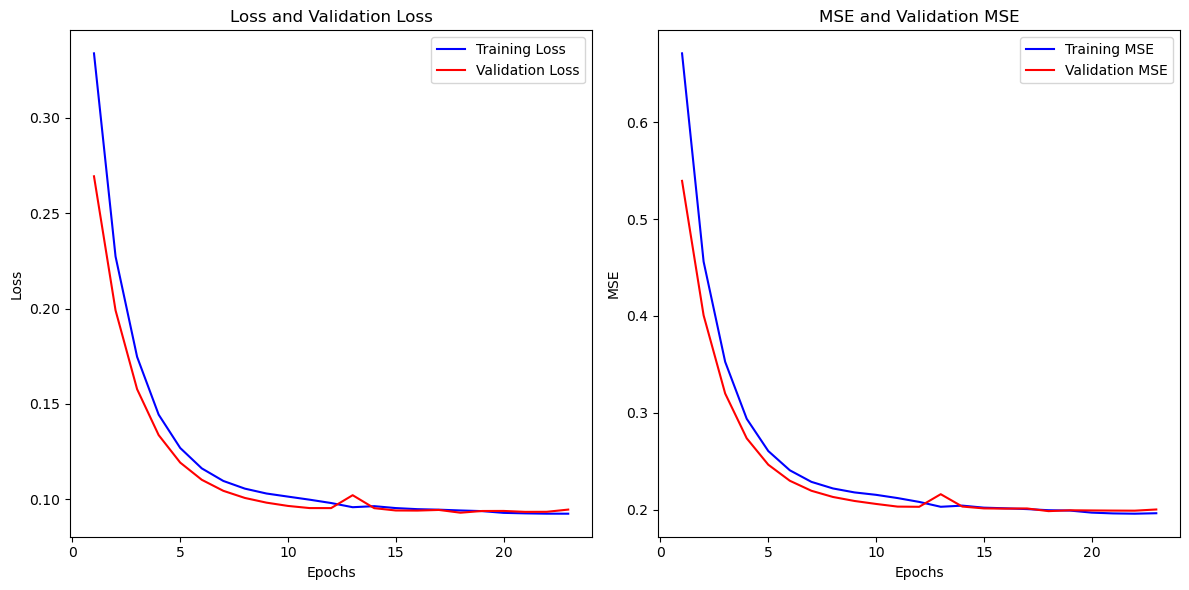

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

mse = history.history['mse']
val_mse = history.history['val_mse']

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(epochs, loss, 'b', label='Training Loss')
ax1.plot(epochs, val_loss, 'r', label='Validation Loss')
ax1.set_title('Loss and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, mse, 'b', label='Training MSE')
ax2.plot(epochs, val_mse, 'r', label='Validation MSE')
ax2.set_title('MSE and Validation MSE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')
ax2.legend()

plt.tight_layout()
plt.show()

In [25]:
# Menggunakan scaler untuk melakukan inverse transform pada data yang telah di-scaled
user_test_unscaled = scalerUser.inverse_transform(user_test_scaled)
item_test_unscaled = scalerItem.inverse_transform(item_test_scaled)
y_test_unscaled = scalerTarget.inverse_transform(y_test_scaled)

# Menampilkan beberapa contoh prediksi
for i in range(50):
    print('Urutan Ke-', i+1)
    print('Data Asli:', y_test_unscaled[i])
    prediction = model.predict([user_test_scaled[i].reshape(1, -1), item_test_scaled[i].reshape(1, -1)])
    prediction_unscaled = scalerTarget.inverse_transform(prediction)[0][0]
    print('Prediksi:', prediction_unscaled)
    print('---')

Urutan Ke- 1
Data Asli: [5.]
1/1 [==============================] - 1s 1s/step
Prediksi: 4.4150553
---
Urutan Ke- 2
Data Asli: [5.]
1/1 [==============================] - 0s 37ms/step
Prediksi: 3.9454017
---
Urutan Ke- 3
Data Asli: [5.]
1/1 [==============================] - 0s 47ms/step
Prediksi: 4.4298153
---
Urutan Ke- 4
Data Asli: [5.]
1/1 [==============================] - 0s 43ms/step
Prediksi: 4.290528
---
Urutan Ke- 5
Data Asli: [4.]
1/1 [==============================] - 0s 42ms/step
Prediksi: 4.5695186
---
Urutan Ke- 6
Data Asli: [5.]
1/1 [==============================] - 0s 40ms/step
Prediksi: 4.5687604
---
Urutan Ke- 7
Data Asli: [5.]
1/1 [==============================] - 0s 38ms/step
Prediksi: 4.4380956
---
Urutan Ke- 8
Data Asli: [5.]
1/1 [==============================] - 0s 52ms/step
Prediksi: 4.290528
---
Urutan Ke- 9
Data Asli: [5.]
1/1 [==============================] - 0s 44ms/step
Prediksi: 4.28588
---
Urutan Ke- 10
Data Asli: [5.]
1/1 [==========================

In [26]:
def predict_ratings(user_vec, item_vecs, model, scalerTarget, restaurant_place, top_n=10):
    # Scale user vector
    suser_vec = scalerUser.transform(user_vec)

    # Scale item vectors
    sitem_vecs = scalerItem.transform(item_vecs)

    # Make a prediction
    y_p = model.predict([suser_vec[:, :], sitem_vecs[:, :]])

    # Unscale predicted ratings
    y_p_unscaled = scalerTarget.inverse_transform(y_p)

    # Sort the results, highest prediction first
    sorted_index = np.argsort(-y_p_unscaled, axis=0).reshape(-1).tolist()
    sorted_ypu = y_p_unscaled[sorted_index]
    sorted_items = item_vecs[sorted_index]

    # Get top N predictions
    top_n_indices = sorted_index[:top_n]
    top_n_ratings = sorted_ypu[:top_n]
    top_n_items = sorted_items[:top_n]

    # Combine with tourism_places DataFrame
    top_n_predictions = restaurant_place.iloc[top_n_indices, :].copy()
    top_n_predictions['Predicted_Rating'] = top_n_ratings

    return top_n_predictions

In [27]:
new_art_gallery = 0
new_bakery = 0
new_bar = 0
new_cafe = 5
new_food = 0
new_liquor_store = 0
new_lodging = 0
new_meal_delivery = 0
new_meal_takeaway = 0
new_night_club = 0
new_restaurant = 0
new_school = 0
new_store = 0

user_vec = np.array([[new_art_gallery, new_bakery, new_bar, new_cafe, new_food, new_liquor_store,
                      new_lodging, new_meal_delivery, new_meal_takeaway, new_night_club,
                      new_restaurant, new_school, new_store]])

user_vecs = np.repeat(user_vec, len(item_vecs), axis=0)

# Memanggil fungsi prediksi
predictions = predict_ratings(user_vecs, item_vecs, model, scalerTarget, restaurant_place, top_n=20)

# Menampilkan hasil prediksi
predictions

22/22 [==============================] - 0s 2ms/step


,name,place_id,formatted_address,types,user_ratings_total,rating,Predicted_Rating
331,Panyawangan Resto,ChIJ9ZwNkgrBzS0RIVUrCT9DB6A,"Jl. Bukit Seraye, Sandik, Kec. Batu Layar, Kab...","restaurant,food,point_of_interest,establishment",543,4.6,4.569519
313,Le Too Much Restaurant World Cuisine & Café De...,ChIJF8zcViuozS0RO57KylS77Ns,"Jl. Raya Kuta, Kuta, Kec. Pujut, Kabupaten Lom...","restaurant,food,point_of_interest,establishment",207,4.5,4.569519
311,Kenza Cafe & Restaurant Kuta Lombok,ChIJjUIwWCuozS0RYMQ5nRsAdjg,"Jl. Raya Kuta No.5B, Kuta Lombok, Kec. Pujut, ...","restaurant,cafe,food,point_of_interest,store,e...",801,4.4,4.569519
540,Restaurant Rasa,ChIJT5SKsC_maC4Rf5xpdyIa8G4,"Jl. Tamblong No.15, Cibeunying, Kec. Sumur Ban...","restaurant,food,point_of_interest,establishment",23,4.0,4.569519
305,Warung Ayam Goreng & Bakar Lombok Ijo,ChIJPf5Q15MXei4RBME4tJ4Gs14,"FR88+5XV, Bayan Krajan, Kadipiro, Kec. Banjars...","meal_takeaway,restaurant,food,point_of_interes...",0,0.0,4.569519
114,Rumah Makan Restu Bundo Masakan Padang,ChIJFYKA_9YVei4ReJdOZSKkfXA,"Jl. Jati No.41, Jati, Cemani, Kec. Grogol, Kab...","restaurant,point_of_interest,food,establishment",14,4.1,4.569519
303,"Wedangan ""Special Sambal Lombok Ijo""",ChIJd210DBsVei4R_TiMz-r3Gq4,"CQGQ+PVG, Jl. Parangkusumo Gentan Baki, Pajang...","restaurant,food,point_of_interest,establishment",1,4.0,4.569519
116,Rumah Makan Padang Rancak Sari,ChIJpQhz69gVei4R0TFKxX2fDnw,"Jl. Sidomukti No.10, Jati, Cemani, Kec. Grogol...","restaurant,point_of_interest,food,establishment",138,4.4,4.569519
317,Laut Biru Bar and Restaurant,ChIJ4Wkg-BinzS0RXKHAwG1pcXw,"Selong Belanak, Praya Barat, Central Lombok Re...","restaurant,food,point_of_interest,establishment",389,4.5,4.569519
541,Braga Permai,ChIJS07xqDrmaC4RzZQFjNhp928,"Jl. Braga No.58, Braga, Kec. Sumur Bandung, Ko...","restaurant,food,point_of_interest,establishment",6308,4.5,4.569519


In [28]:
# Simpan model terlatih sebagai file HDF5
#saved_model_path = "D:/Project Jejaka/my_model_restaurant.h5"
#model.save(saved_model_path)

# Konversi model ke format JSON menggunakan tensorflowjs_converter
#converted_model_path = 'D:/Project Jejaka/tfjs_model_restaurant'
#tfjs.converters.save_keras_model(model, converted_model_path)

#print("Model saved successfully!")

In [29]:
import os

model_version = "1"
model_save = "model-restaurant"
model_path = os.path.join(model_save, model_version)
tf.keras.models.save_model(model, model_path)
print("Model saved successfully!")

INFO:tensorflow:Assets written to: model-restaurant\1\assets


INFO:tensorflow:Assets written to: model-restaurant\1\assets


Model saved successfully!
